# why Concurrency?

# Concurrency vs Parallelism

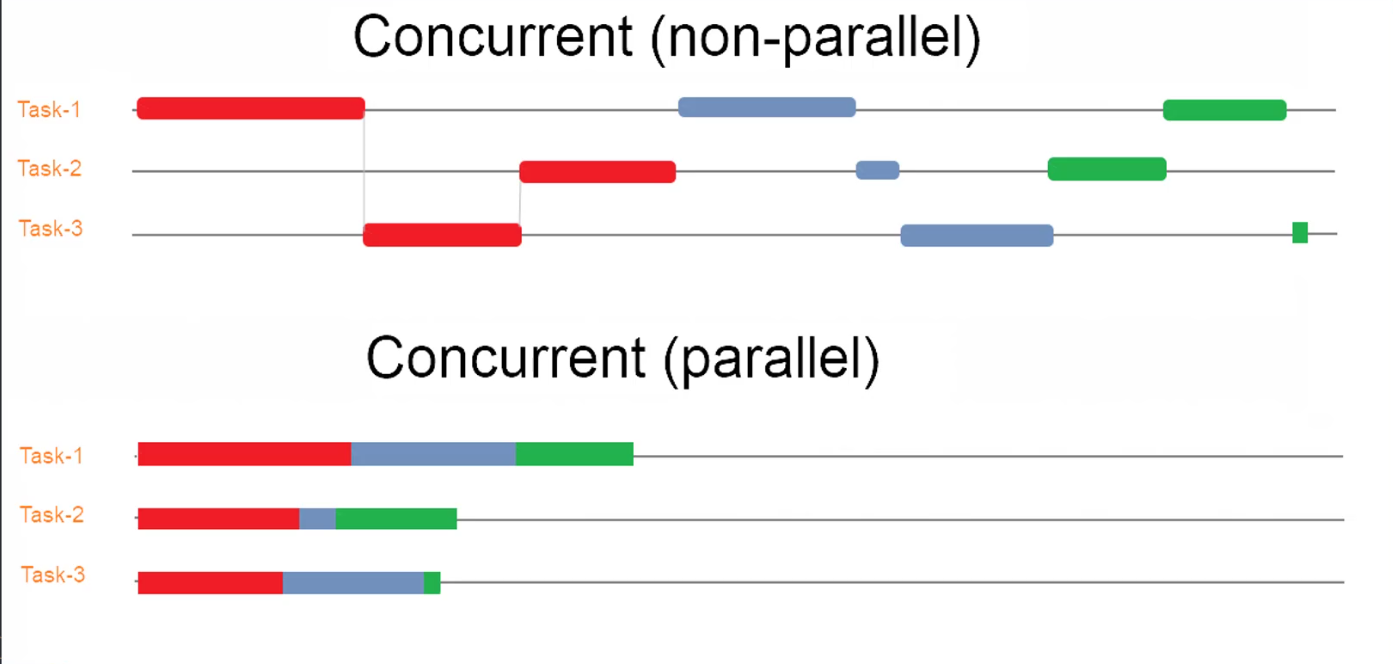

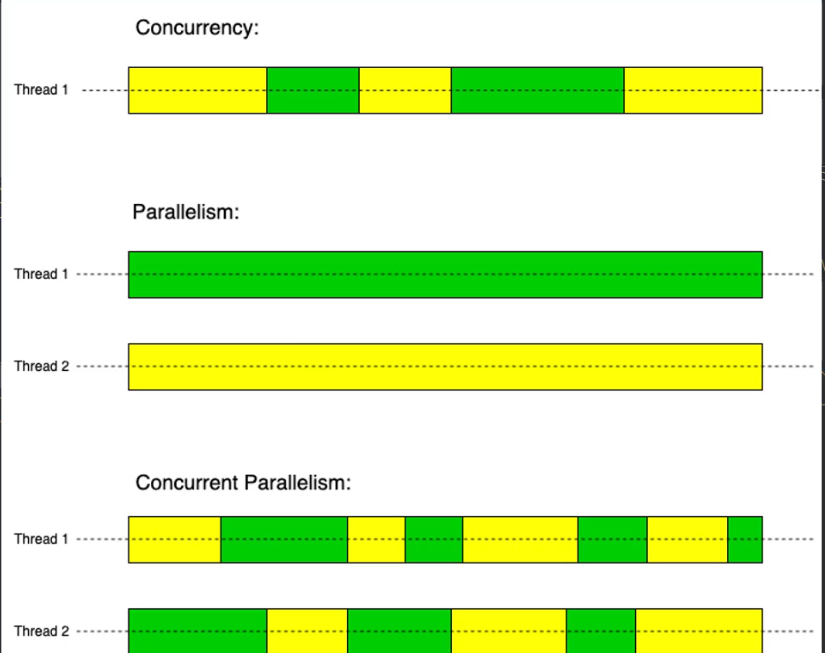

# روش های همزمانی در پایتون

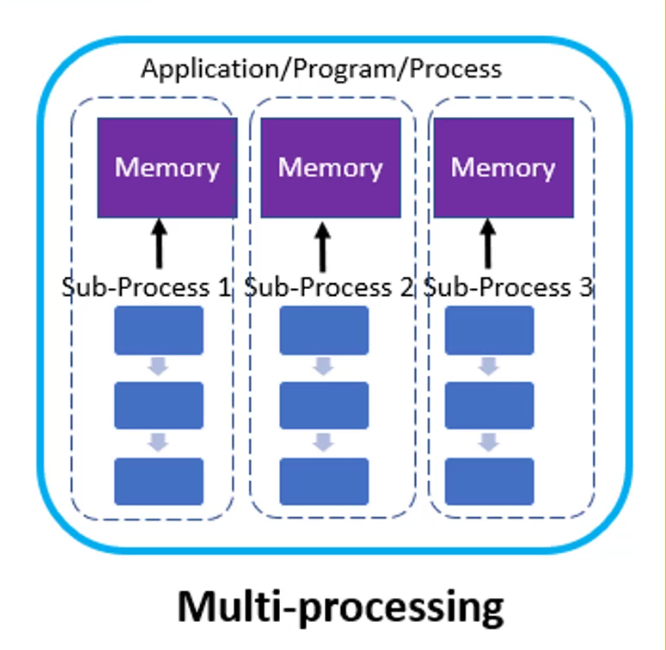

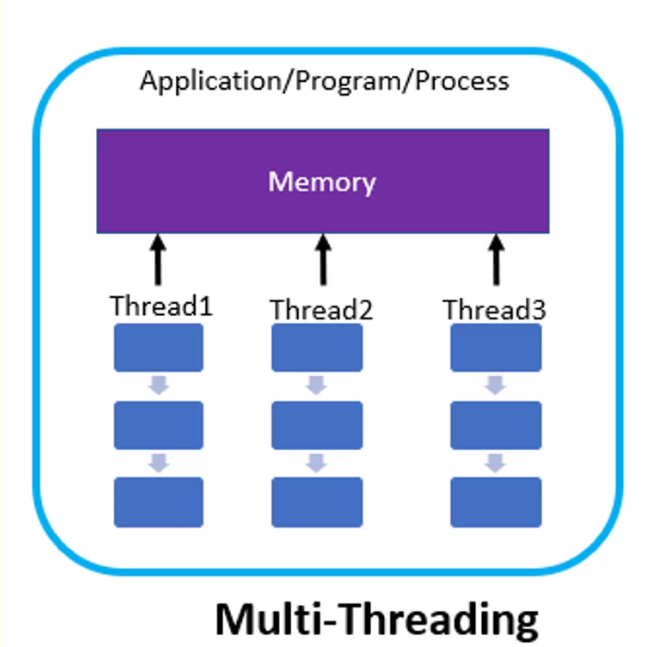

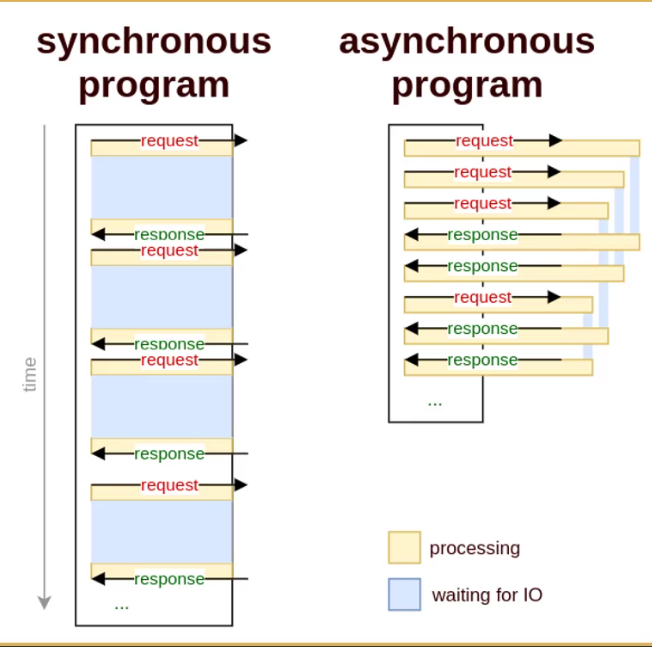

# multithreading

In [2]:
import time

print("main thread start!")

def func(n):
    print(f"function {n} start!")
    time.sleep(3)
    print(f"function {n} finish!")

    
func(1)
func(2)
func(3)

print("main thread start!")


main thread start!
function 1 start!
function 1 finish!
function 2 start!
function 2 finish!
function 3 start!
function 3 finish!
main thread start!


In [14]:
# حالا میخاهیم بصورت همزمان این کار را انجام دهیم
import time
import threading

print("\n main thread start!")

def th_func(n):
    print(f"\n thread {n} start!")
    time.sleep(3)
    print(f"\n thread {n} finish!")

# ابتدا باید یک نمونه از ترید بسازیم
# و بعد آن را استارت بزنیم
thread = threading.Thread(target=th_func, args=[1])
thread.start()

print("\n main thread start!")


 main thread start!

 thread 1 start!

 main thread start!

 thread 1 finish!


In [9]:
# حلا اگر بخاهیم ترید منتظر بماند تا کامل اجرا شود و بعد ادامه دستورات اجرا شود
# join

import time
import threading

print("\n main thread start!")

def th_func(n):
    print(f"\n thread {n} start!")
    time.sleep(3)
    print(f"\n thread {n} finish!")

    
thread = threading.Thread(target=th_func, args=[1])
thread.start()
thread.join()

print("\n main thread start!")


 main thread start!

 thread 1 start!

 thread 1 finish!

 main thread start!


In [12]:
# حالا تگر چنتا ترید را بخاهیم اجرا بکنیم

import time
import threading

print("\n main thread start!")

def th_func(n):
    print(f"\n thread {n} start!")
    time.sleep(3)
    print(f"\n thread {n} finish!")

    
threads = [threading.Thread(target=th_func, args=[i]) for i in range(5)]
for th in threads:
    th.start()
for th in threads:
    th.join()

print("\n main thread start!")

# همینطور که میبینید به ترتیب شروع شده اند اما پایان انها به ترتیب نیست
# زیرا همزمان دارن اجرا میشوند



 main thread start!

 thread 0 start!

 thread 1 start!

 thread 2 start!

 thread 3 start!

 thread 4 start!

 thread 0 finish!

 thread 3 finish!

 thread 1 finish!

 thread 2 finish!

 thread 4 finish!

 main thread start!


In [13]:
# حالا تگر چنتا ترید را بخاهیم اجرا بکنیم

import time
import threading

print("\n main thread start!")

def th_func(n):
    print(f"\n thread {n} start!")
    time.sleep(3)
    print(f"\n thread {n} finish!")

    
threads = [threading.Thread(target=th_func, args=[i]) for i in range(5)]
for th in threads:
    th.start()
# for th in threads:
#     th.join()

print("\n main thread start!")



 main thread start!

 thread 0 start!

 thread 1 start!

 thread 2 start!

 thread 3 start!

 thread 4 start!

 main thread start!

 thread 0 finish!

 thread 1 finish!

 thread 2 finish!

 thread 3 finish!

 thread 4 finish!


In [16]:

visits = 0

def visit_counter():
    global visits
    for i in range(1_000_000):
        value = visits
        visits = value +1
        
count = 2
visit_counter()
visit_counter()

print(f"{count=}, {visits}")


count=2, 2000000


In [21]:
from threading import Thread
thread_visits = 0

def visit_counter():
    global thread_visits
    for i in range(1_000_000):
        value = thread_visits
        thread_visits = value +1
        
thread_count = 2
threads = [Thread(target=visit_counter) for _ in range(thread_count)]

for thread in threads:
    thread.start()
    
for thread in threads:
    thread.join()

print(f"{thread_count=}, {thread_visits}")

# ممکن است این برنامه در نسخه های پایین تر یا سیستم های ضعیف تر جواب متفاوت بدست آورد
# race condition - race hazard
# زیرا ترید ها از حافظه مشترکی ستفاده میکنند و اگر چندین ترید بخاهد آن را تغییر دهند به شکل خاهیم خورد



thread_count=2, 2000000


In [ ]:
# برای حل مشکل باید حافظه را وقتی ترید ما روی آن کار میکند باید قفل شود
# حالا قسمتی که حساس است را و حافظه درگیر میشود از لاک استفاده بکنیم
# باعث کاهش عملکرد میشوند

from threading import Threadو Lock
thread_visits = 0
# یک نمونه از لاک میسازیم
thread_visits_lock = Lock()

def visit_counter():
    global thread_visits
    for i in range(1_000_000):
        # هربار که این کار را انجام میدهد مموری را قفل بکند و دسترسی به ترید های دیگر را کاهش میدهد
        with thread_visits_lock:
            thread_visits += 1
        
thread_count = 2
threads = [Thread(target=visit_counter) for _ in range(thread_count)]

for thread in threads:
    thread.start()
    
for thread in threads:
    thread.join()

print(f"{thread_count=}, {thread_visits}")